# Modelo Recomendador KNN

Se importan librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
#Se da lectura del archivo cvs 
dataframe = pd.read_csv(r"datasetrecomendadorpeliculas.csv")

# Configurar Pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [3]:
dataframe.head()

,Edad,Sexo,Acción,Aventura,Animación,Comedia,Crimen,Documental,Drama,Familiar,Fantasía,Historia,Horror,Musical,Misterio,Romance,Ciencia Ficción,Suspense,Guerra,Western,P_Acción,P_Aventura,P_Animación,P_Comedia,P_Crimen,P_Documental,P_Drama,P_Familiar,P_Fantasía,P_Historia,P_Horror,P_Musical,P_Misterio,P_Romance,P_Ciencia Ficción,P_Suspense,P_Guerra,P_Western,Calificación,Le Gustó
0,52,1,0.16,0.25,0.30,0.27,0.61,0.40,0.00,0.33,0.25,0.14,0.56,0.34,0.90,0.40,0.50,0.90,0.50,0.43,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0.75,0
1,55,2,0.38,0.19,0.42,0.34,0.38,0.91,0.70,0.26,0.35,0.27,0.03,0.25,0.88,0.07,0.44,0.04,0.09,0.04,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.82,1
2,21,2,0.33,0.49,0.10,0.73,0.48,0.32,0.73,0.21,0.28,0.23,0.48,0.45,0.02,0.70,0.09,0.07,0.29,0.21,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0.72,0
3,41,1,0.16,0.14,0.19,0.37,0.26,0.12,0.65,0.19,0.88,0.42,0.02,0.16,0.11,0.63,0.49,0.09,0.30,0.22,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.75,0
4,63,2,0.42,0.20,0.41,0.19,0.04,0.46,0.75,0.71,0.40,0.47,0.15,0.13,0.09,0.67,0.42,0.10,0.49,0.39,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.63,0


In [4]:
dataframe.describe()

,Edad,Sexo,Acción,Aventura,Animación,Comedia,Crimen,Documental,Drama,Familiar,Fantasía,Historia,Horror,Musical,Misterio,Romance,Ciencia Ficción,Suspense,Guerra,Western,P_Acción,P_Aventura,P_Animación,P_Comedia,P_Crimen,P_Documental,P_Drama,P_Familiar,P_Fantasía,P_Historia,P_Horror,P_Musical,P_Misterio,P_Romance,P_Ciencia Ficción,P_Suspense,P_Guerra,P_Western,Calificación,Le Gustó
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000
mean,43.213600,1.508800,0.341436,0.372966,0.250768,0.402622,0.279332,0.449092,0.538272,0.355782,0.361126,0.322300,0.297408,0.335394,0.400560,0.41666,0.347782,0.288434,0.274598,0.251786,0.131400,0.125400,0.130400,0.118200,0.125400,0.124000,0.130600,0.132200,0.118400,0.132800,0.121600,0.128800,0.12240,0.129000,0.132200,0.130600,0.12860,0.12720,0.799040,0.415200
std,14.925231,0.499973,0.248500,0.247713,0.146144,0.256004,0.177090,0.274189,0.270814,0.267687,0.239704,0.223351,0.178755,0.198804,0.256321,0.26561,0.232374,0.195240,0.165093,0.146469,0.337871,0.331205,0.336777,0.322877,0.331205,0.329615,0.336996,0.338742,0.323113,0.339392,0.326856,0.335012,0.32778,0.335233,0.338742,0.336996,0.33479,0.33323,0.097987,0.492806
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.460000,0.000000
25%,30.000000,1.000000,0.150000,0.180000,0.120000,0.200000,0.130000,0.210000,0.300000,0.150000,0.170000,0.150000,0.140000,0.160000,0.190000,0.19000,0.160000,0.130000,0.130000,0.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.730000,0.000000
50%,43.000000,2.000000,0.300000,0.350000,0.250000,0.380000,0.270000,0.420000,0.620000,0.300000,0.340000,0.300000,0.300000,0.340000,0.380000,0.39000,0.330000,0.270000,0.270000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.800000,0.000000
75%,56.000000,2.000000,0.450000,0.490000,0.380000,0.600000,0.410000,0.700000,0.760000,0.460000,0.490000,0.440000,0.440000,0.480000,0.600000,0.65000,0.470000,0.420000,0.410000,0.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.870000,1.000000
max,69.000000,2.000000,1.000000,1.000000,0.500000,1.000000,0.800000,1.000000,1.000000,1.000000,1.000000,1.000000,0.700000,0.800000,1.000000,1.00000,1.000000,0.900000,0.700000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000


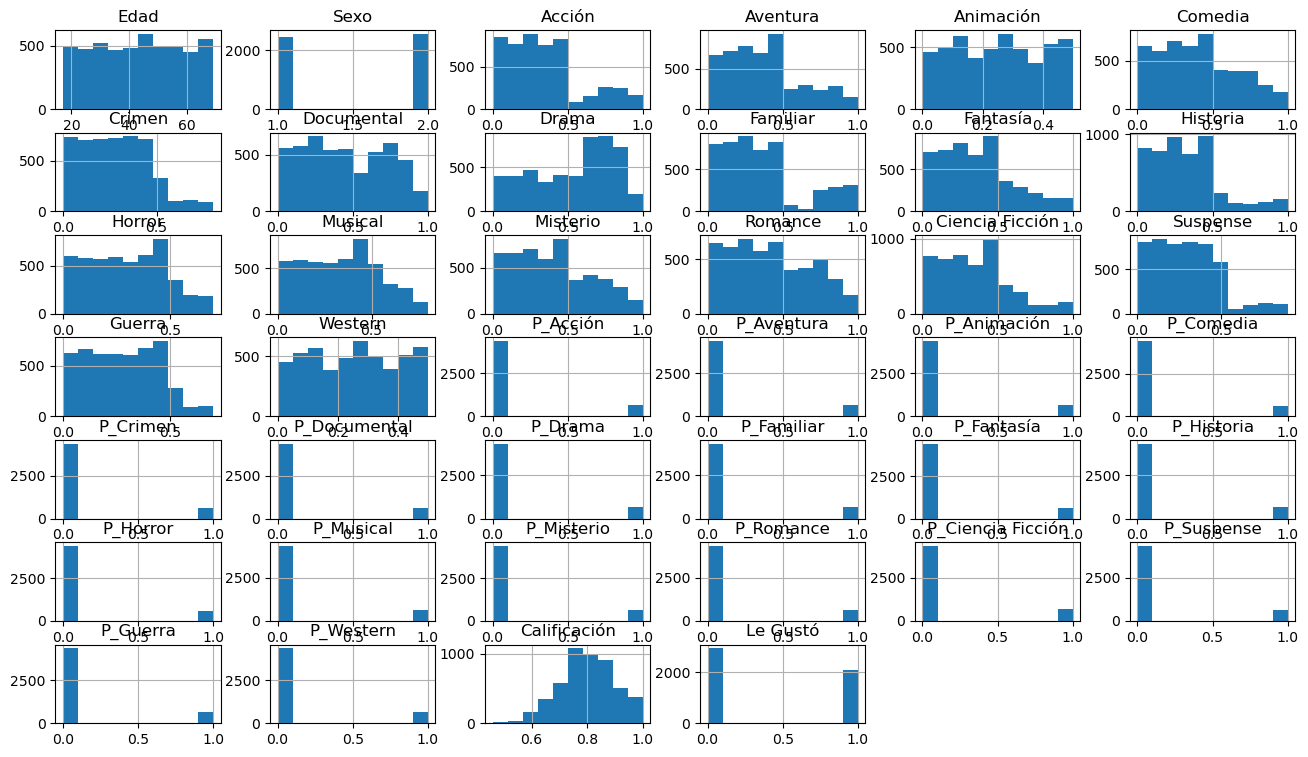

In [5]:
plt.rcParams['figure.figsize'] = (16, 9)

dataframe.hist()
plt.show()

In [6]:
print(dataframe.groupby('Le Gustó').size())

Le Gustó
0    2924
1    2076
dtype: int64


In [7]:
# Filtrar para obtener solo las filas donde "Le Gustó" es 0
df_cero = dataframe[dataframe['Le Gustó'] == 0]

# Filtrar para obtener solo las filas donde "Le Gustó" es 1
df_uno = dataframe[dataframe['Le Gustó'] == 1]

# Elegir al azar 961 registros para eliminar
df_eliminarcero = df_cero.sample(n=997, random_state=42)  # Usamos random_state para reproducibilidad
# Elegir al azar 39 registros para eliminar
df_eliminaruno = df_uno.sample(n=3, random_state=42)  # Usamos random_state para reproducibilidad

# Eliminar los registros seleccionados del dataframe original
dataframe = dataframe.drop(df_eliminarcero.index)
dataframe = dataframe.drop(df_eliminaruno.index)

In [8]:
print(dataframe.groupby('Le Gustó').size())

Le Gustó
0    1927
1    2073
dtype: int64


In [9]:
X = dataframe.drop('Le Gustó', axis=1).drop('Edad', axis=1).drop('Sexo', axis=1).values
y = dataframe['Le Gustó'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [10]:
print(X)

[[0.38 0.19 0.42 ... 1.   0.   0.82]
 [0.33 0.49 0.1  ... 0.   0.   0.72]
 [0.16 0.14 0.19 ... 0.   1.   0.75]
 ...
 [0.   0.2  0.19 ... 0.   0.   0.75]
 [0.07 0.3  0.42 ... 0.   0.   0.84]
 [0.08 0.48 0.14 ... 0.   0.   0.8 ]]


In [11]:
print(y)

[1 0 0 ... 1 1 1]


In [19]:
n_neighbors = 108

knn = KNeighborsClassifier(n_neighbors, weights='uniform')
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.76
Accuracy of K-NN classifier on test set: 0.75


In [20]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[260 112]
 [ 85 343]]
              precision    recall  f1-score   support

           0       0.75      0.70      0.73       372
           1       0.75      0.80      0.78       428

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



([<matplotlib.axis.XTick at 0x16947ec90>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90'),
  Text(100, 0, '100'),
  Text(150, 0, '150'),
  Text(200, 0, '200')])

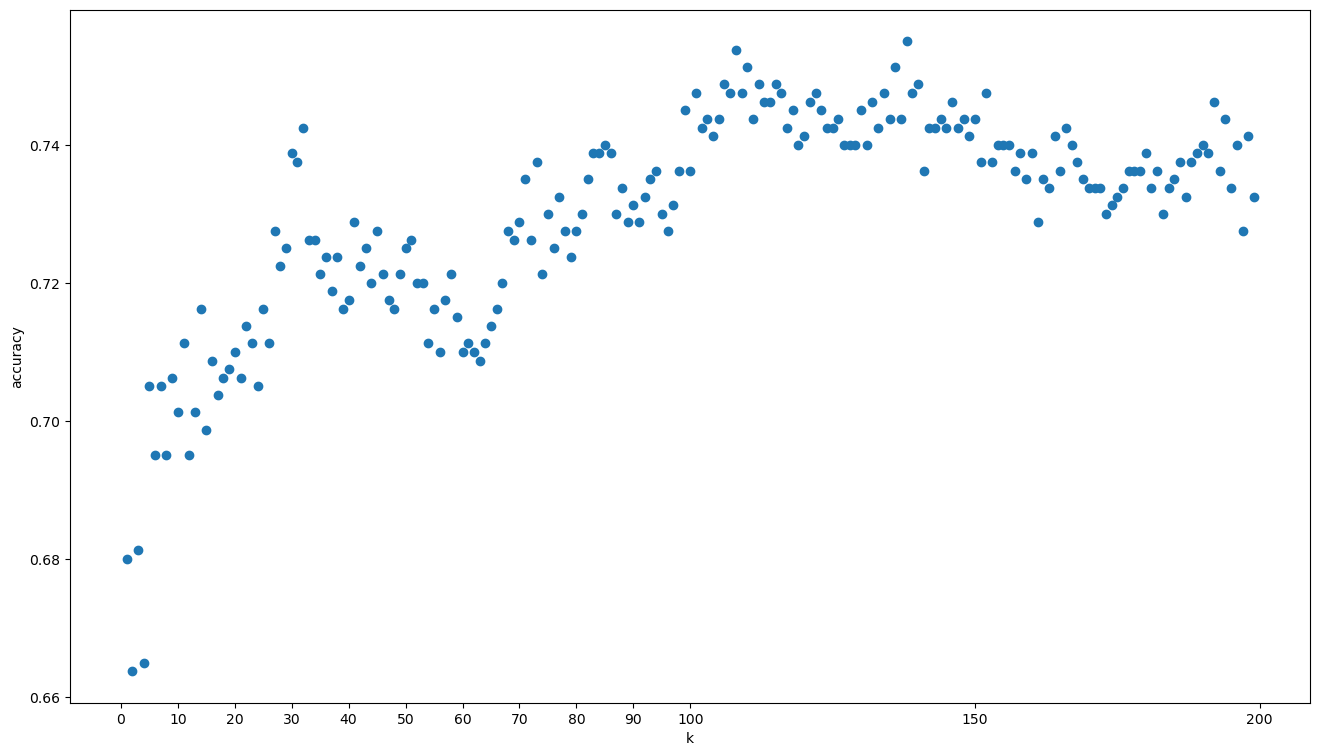

In [14]:
k_range = range(1, 200)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,10,20,30,40,50,60,70,80,90,100,150,200])

([<matplotlib.axis.XTick at 0x16d73a0d0>,
 [Text(100, 0, '100'),
  Text(105, 0, '105'),
  Text(110, 0, '110'),
  Text(115, 0, '115'),
  Text(120, 0, '120')])

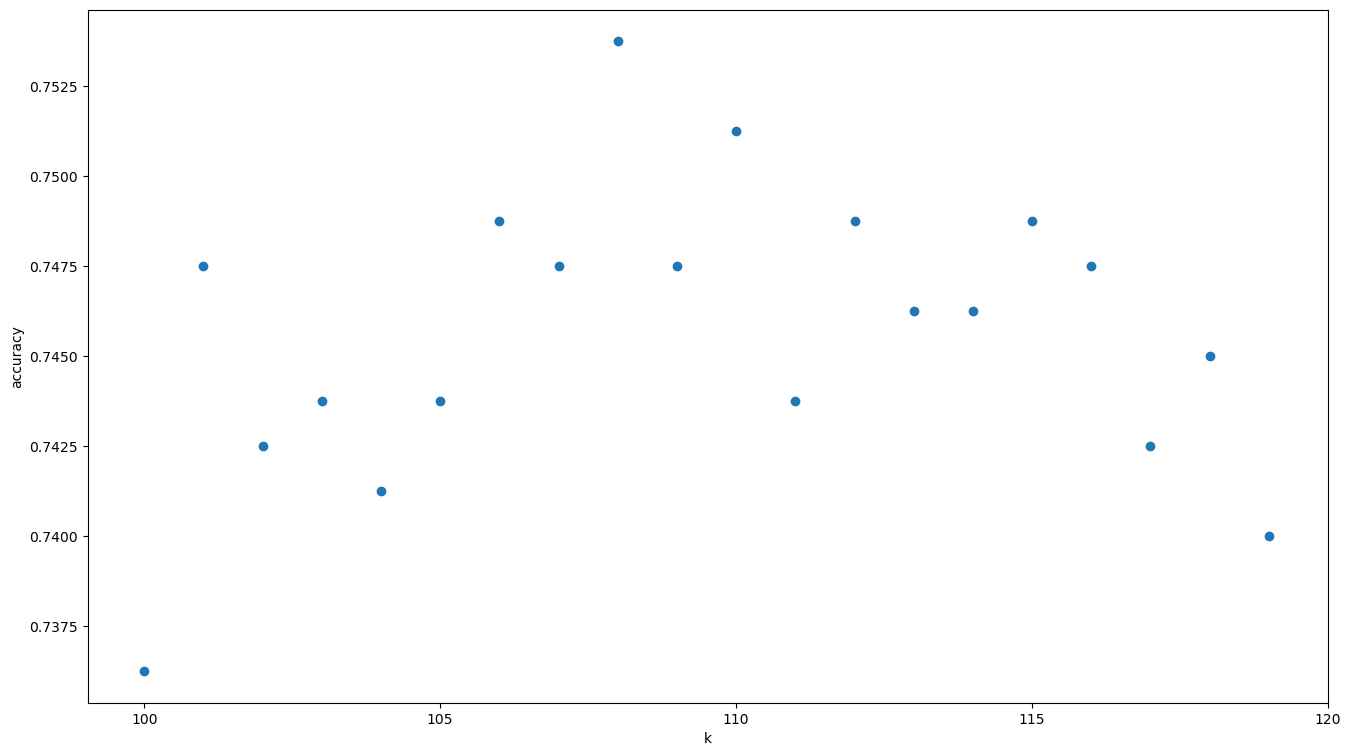

In [15]:
k_range = range(100, 120)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([100,105,110,115,120])

In [16]:
clf = KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X, y)
print(clf.predict_proba([[0.9,0.8,0.7,0.5,0.5,0.5,0,0,0,0,0,0,0,0,0,0,0.9,0.9,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.9]]))

[[0.37735849 0.62264151]]


In [17]:
print(knn.predict_proba([[0.9,0.8,0.7,0.5,0.5,0.5,0,0,0,0,0,0,0,0,0,0,0.9,0.9,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.9]]))

[[0.3697479 0.6302521]]


In [18]:
with open('recomendadorknn.pkl', 'wb') as file:
    pickle.dump(knn, file)